<a href="https://colab.research.google.com/github/tluistorres/Cursos/blob/main/Estat%C3%ADstica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como vamos explorar os dados das bases, gerar visualizações e responder a perguntas, vamos trazer um pacote extremamente importante e bastante utilizado por pessoas cientistas e pequisadoras quee é o panddas.

## 1.1 Importando os pacotes e lendo os dados

In [1]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/estatistica-r-frequencias-medidas/refs/heads/main/dados/vendas_ecommerce.csv '
df = pd.read_csv(url)
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


Retornar a quantidade de linhas e colunasdo dataset

In [6]:
df.shape

(200000, 10)

Verificar o nome de cada coluna, a quantidade de dados não nulos existente na coluna em questão e o tipo de dado

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


## 1.2 Investigando os tipos dos daddos

Observando rapidamente os dados, podemos notar dados em formatos de textos, números inteiros, números com casas decimais. A depender da análise que queremos fazer, cada um tem uma forma de ser trabalhado e adequado para a extração de informação dos dados.

In [9]:
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


Assim, obtemos as cinco primeiras linhas do dataset, que apresentam uma variedade de tipos diferentes de dados.

Existem dados de string, como sexo_biologico, e dados numéricos, como o total_compra, que é um dado numérico decimal. Outro exemplo é a idade_cliente, que é um dado inteiro, por exemplo, 33 anos.

Essas variáveis (ou colunas) podem ser classificadas em dois tipos: variáveis categóricas, que são consideradas qualitativas; e variáveis numéricas, que são consideradas quantitativas. Vamos explorar um pouco mais sobre essas classificações.

  - Qualitativas (categóricas): representam uma característica ou categoria e são subdivididas em duas classificações:

    - Nominais: não possuem uma ordem natural, como o tipo do produto;

    - Ordinais: possuem uma ordem ou hierarquia, como nível de escolaridade, que segue uma sequência como primeira série, segunda série, terceira série, e assim por diante.

  - Quantitativas (numéricas): representam números e podem ser mensuradas. Elas são subdivididas em duas classificações:

    - Quantitativas discretas: são valores inteiros e contáveis, como a quantidade de produtos;
    - Quantitativas contínuas: podem assumir qualquer valor em um intervalo, como altura ou peso.

## Manipulando variável qualitativa nominal

A partir disso, podemos realizar análises sobre nossos dados. Vamos começar investigando uma variável qualitativa nominal, que é a quantidade de vendas. Nesse caso, vamos calculá-la por categoria.

Para isso, precisamos buscar as categorias existentes dentro do nosso dataset. Aplicaremos um filtro para buscar apenas a variável categoria. Em uma nova célula, especificamos df e passamos o campo que queremos filtrar entre colchetes e aspas, que é categoria_produto.

In [11]:
df['categoria_produto']

,categoria_produto
0,Ferramentas e Construção
1,Alimentos e Bebidas
2,Eletrônicos
3,Eletrônicos
4,Papelaria e Escritório
...,...
199995,Eletrônicos
199996,Eletrônicos
199997,"Roupas, Calçados e Acessórios"
199998,Alimentos e Bebidas


Obtemos como retorno apenas a coluna de categoria. No entanto, como todos os registros são retornados, existem várias categorias duplicadas. Vamos aplicar um filtro para retornar apenas as categorias de forma única. A partir do código inicial, vamos acrescentar a função unique()

In [12]:
df['categoria_produto'].unique()

array(['Ferramentas e Construção', 'Alimentos e Bebidas', 'Eletrônicos',
       'Papelaria e Escritório', 'Beleza e Cuidados Pessoais',
       'Casa e Mobílias', 'Roupas, Calçados e Acessórios', 'Livros',
       'Brinquedos', 'Esporte e Lazer'], dtype=object)

Com essa função, é retornado um array com apenas as categorias únicas, sem repetição. Temos ferramentas de construção, alimentos e bebidas, eletrônicos, papelaria, escritório, entre outros.

No entanto, queremos a quantidade de vendas por categoria. Vamos avançar na construção desse objetivo. Em uma nova célula, vamos especificar novamente o df['categoria_produto'] e realizar a contagem através da função value_counts( ).

In [13]:
df['categoria_produto'].value_counts()

,count
categoria_produto,
Eletrônicos,36060
"Roupas, Calçados e Acessórios",27917
Casa e Mobílias,26015
Beleza e Cuidados Pessoais,22026
Esporte e Lazer,19939
Alimentos e Bebidas,18022
Papelaria e Escritório,13936
Livros,13790
Ferramentas e Construção,12063


Ordenar os resultados em ordem decrescente (padrão), você pode usar ascending=False ou simplesmente omitir o parâmetro ascending, pois False é o valor padrão.


In [15]:
df['categoria_produto'].value_counts(ascending=False)

,count
categoria_produto,
Eletrônicos,36060
"Roupas, Calçados e Acessórios",27917
Casa e Mobílias,26015
Beleza e Cuidados Pessoais,22026
Esporte e Lazer,19939
Alimentos e Bebidas,18022
Papelaria e Escritório,13936
Livros,13790
Ferramentas e Construção,12063


Assim, obtemos a quantidade de vendas por cada categoria. A categoria com mais vendas é a de eletrônicos, seguida por roupas e calçados.

Para visualizar melhor essa informação, vamos plotar um gráfico. Antes disso, precisamos ajustar o comando. Quando utilizamos value_counts( ), cria-se uma series. Para plotar o gráfico com esses dados, precisamos que essa informação volte a ser um dataframe.

Para isso, utilizamos a função reset_index( ). Além disso, salvamos essas informações na variável produtos.

In [16]:
df['categoria_produto'].value_counts().reset_index()

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


In [20]:
produtos = df['categoria_produto'].value_counts().reset_index()

Agora, vamos plotar essas informações em um gráfico. Para realizar a plotagem, vamos importar a biblioteca Matplotlib, utilizada para plotagem de gráficos. Em uma nova célula, importamos a biblioteca matplotlib, especificamente o pacote pyplot, e usamos o alias plt.

In [17]:
import matplotlib.pyplot as plt


Em seguida, especificamos plt.barh( ) para plotar um gráfico de barras horizontais. Dentro da função, vamos definir a coluna produtos['categoria_produto'] no eixo Y e a coluna produtos['count'] no eixo X. Assim, plotamos a categoria do produto e a contagem de vendas.

Por fim, adicionamos plt.show( ) para visualizar o gráfico.

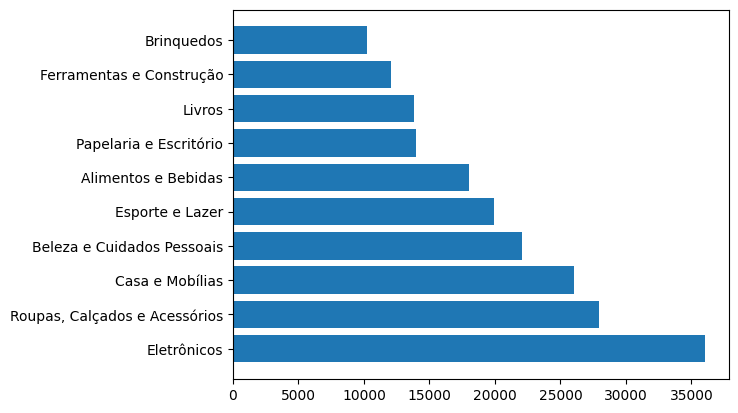

In [21]:

plt.barh(produtos['categoria_produto'], produtos['count'])
plt.show()

No gráfico, as categorias aparecem ordenadas da menor para a maior quantidade de vendas. A visualização gráfica torna mais interessante trabalhar e identificar os dados. Com isso, conseguimos identificar uma informação importante: a categoria de eletrônicos é a que mais possui vendas, o que é relevante para nosso cliente, uma rede de varejo.

Já trabalhamos com uma variável qualitativa nominal, mas há diversos outros tipos de variáveis que podemos explorar.

## Para saber mais: tipos de variáveis

As variáveis são características ou atributos que coletamos em uma base de dados. Elas podem ser classificadas em dois grandes tipos: variáveis qualitativas e variáveis quantitativas.

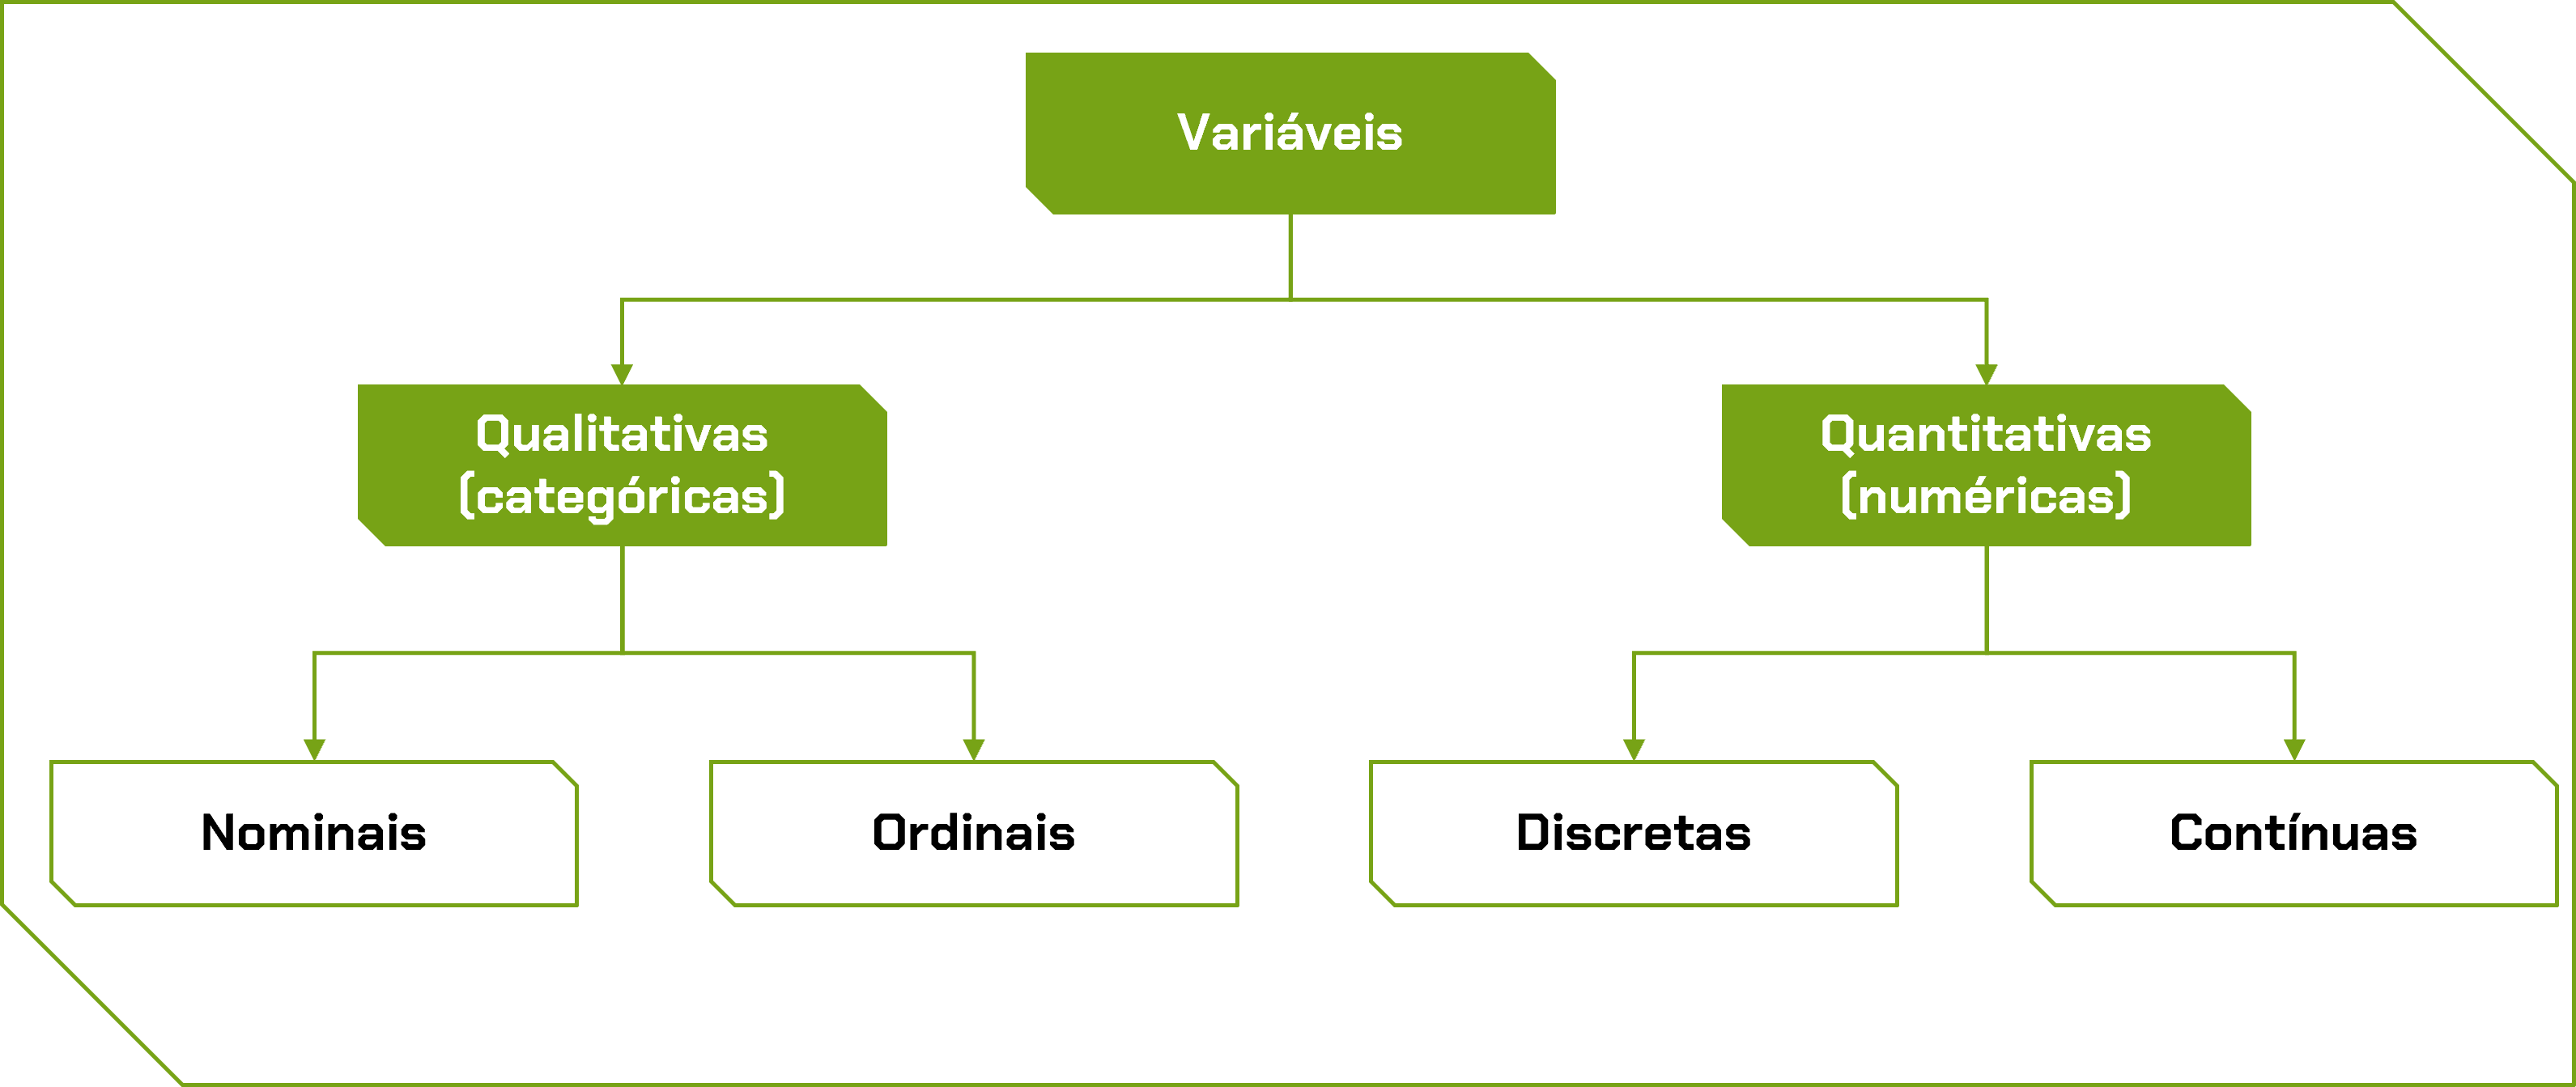

Entender esses tipos e suas subdivisões é de extrema importância para a análise exploratória e extração de informações relevantes com os dados. Vamos explorar cada tipo presente na tabela abaixo que possui os dados sobre a condição e desempenho de jogadores de um time de futebol:

| Jogador | Posição | Condição Física | Situação | Média de km | Jogos | Gols | Assistências | CA | CV |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Rodrigo | GOL | Boa | Titular | 0.0 | 30 | 0 | 0 | 1 | 0 |
| João | ZAG | Regular | Reserva | 7.5 | 18 | 1 | 0 | 3 | 1 |
| Rômulo | MEI | Ruim | Lesionado | 6.5 | 10 | 2 | 3 | 2 | 0 |
| Pedro | PD | Boa | Titular | 9.3 | 25 | 8 | 5 | 4 | 0 |
| Marcelo | ATA | Boa | Titular | 8.1 | 28 | 12 | 4 | 2 | 0 |

Agora que sabemos os dados que possuímos, vamos analisar quais deles são qualitativos e quantitativos, e também como estão divididos dentro do seu próprio tipo.

## Variáveis qualitativas (categóricas)

As variáveis qualitativas representam características que não podem ser medidas numericamente, mas podem ser categorizadas, ou seja, representam uma classificação. Elas podem ser subdivididas em:

1. Variáveis qualitativas nominais: classifica os elementos em classes ou categorias em relação ao tipo do dado representado. Ela não possui uma relação de grandeza ou ordem dos dados. Exemplo:

   - Jogador: representando o nome do atleta (ex.: Rodrigo, Pedro).

   - Posição: a posição em que o jogador ocupa (ex.: GOL, ZAG)

2. Variáveis qualitativas ordinais: também classifica os elementos em classes ou categorias, porém existe uma ordem natural ou hierárquica entre elas. Exemplo:

   - Condição física: a condição física atual que o atleta se encontra (ex: Boa, Regular, Ruim)

   - Situação: situação atual do atleta no time (ex: Titular, Reserva, Lesionado).

Observação: a depender dos tipos dos dados, é possível que uma variável qualitativa possa ser representada por números. Por exemplo, uma coluna que representa uma característica em que 0 simboliza “Não” e 1 simboliza “Sim”. Os números aqui servem para resumir a representação dos dados e não devem ser utilizados para cálculo, por exemplo, de média.

## Variáveis quantitativas (numéricas)

As variáveis quantitativas representam medidas numéricas ou quantidades observáveis que podem ser expressas em números. Elas são resultantes de contagens (conjunto finito de valores) ou mensurações (conjunto infinito de valores). Elas são subdivididas em:

1. Variáveis quantitativas discretas: quando assumem valores inteiros e contáveis. Exemplo:

   - Jogos: número de partidas jogadas.

   - Gols e Assistências: quantidade total de gols e assistências.

   - CA (Cartões Amarelos) e CV (Cartões Vermelhos): número de cartões recebidos.

2. Variáveis quantitativas contínuas: podem assumir qualquer valor dentro de um intervalo específico e geralmente são expressos como números reais. Exemplo:

   - Média de km: distância média percorrida em jogos (Ex: 9.5 km, 7.8 km).

Observe como conseguimos descrever como cada variável se comporta e o que ela apresenta. Com isso fica mais fácil saber definir o que fazer com aquele dado e qual tipo de análise recorrer. A identificação correta dos tipos de variáveis é de suma importância para:

   - Visualização de dados: o tipo de variável determina o tipo de gráfico a ser utilizado. Por exemplo, para variáveis qualitativas, podemos utilizar tabelas de frequência e gráficos de barras. E para variáveis quantitativas, podemos usar histogramas, boxplots e gráficos de dispersão.

   - Estatística descritiva: definindo o tipo de variável teremos diferentes ferramentas estatísticas para a exploração dos dados. Seja focando em contagem e análise de dados frequentes ou calculando as medidas de tendência e dispersão dos dados, por exemplo.

   - Modelagem: Alguns algoritmos funcionam melhor com variáveis numéricas, enquanto outros podem incorporar informações categóricas. Saber como tratar cada uma delas aumenta o potencial, por exemplo, de um modelo de aprendizado de máquina.

Agora que sabemos a importância de compreender os diferentes tipos de variáveis, podemos dar mais um passo em nossas análises explorando as informações e insights que os dados podem nos fornecer.



## 1.3 Manipulando dados qualitativos ordinais

Até o momento, conseguimos entender como classificar nossas variáveis em quantitativas e qualitativas. Já trabalhamos com uma variável qualitativa nominal, que é a categoria do produto.

Agora, continuaremos trabalhando com outras variáveis, especificamente a variável de avaliação. Esta variável é numérica, pois representa a satisfação de cliente, mapeada através de notas que variam de 1 a 5 - onde 1 indica que a pessoa classifica o produto como péssimo e 5 como ótimo.

Nosso objetivo é transformar essa variável numérica em uma variável textual, permitindo que a utilizemos como uma variável qualitativa ordinal, já que possui uma ordem.

## Manipulando variável qualitativa ordinal

Vamos realizar a conversão de uma variável numérica para string. Ao invés de ter avaliações de 1 a 5, vamos categorizá-las como péssimo, ruim, regular, bom e ótimo.

O primeiro passo é buscar as informações das notas existentes. Utilizaremos um comando que já utilizamos anteriormente, que é o unique( ), para filtrar e retornar apenas os valores únicos.

Em uma nova célula, especificamos df e abrimos e fechamos colchetes para especificar o nome da variável, que é a avaliacao. Como queremos apenas os valores únicos, passamos a função unique( ) e executamos com "Shift + Enter".

In [23]:
df['avaliacao'].unique()

array([1, 4, 5, 3, 2])

Diferente da variável categoria_produto, que não possuía ordem e não precisou de ordenação, a variável de avaliação possui ordem, ou seja, uma hierarquia. Para ordenar esse retorno, utilizaremos a função sorted( ), que realiza a ordenação.

Pegamos o código criado e passamos para a função sorted( ). Para isso, abrimos parênteses no início do código e fechamos após unique( ). Depois de executar, obtemos a ordenação de 1 a 5.

In [27]:
sorted(df['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Agora que filtramos e entendemos os dados com os quais trabalharemos, começaremos a conversão, transformando as informações de numérico para string. No entanto, não queremos excluir a variável numérica da base de dados. Por isso, vamos criar um novo campo de avaliação que armazene os valores textuais.

Para isso, especificamos df, abrimos colchetes e definimos o nome do novo campo, que será avaliacao indicador. Em seguida, utilizamos uma função do Pandas chamada Categorical( ), que cria uma coluna categórica no DataFrame.

Esse novo campo vai receber pd.Categorical( ). Dentro da função, vamos indicar que armazenaremos os dados da coluna df['avaliacao'].

Em seguida, no parâmetro categories, especificamos as categorias possíveis dentro desse campo, que são 1, 2, 3, 4, 5. Ou seja, vão existir cinco categorias. Por fim, no parâmetro ordered, indicamos que essas categorias possuem uma ordem que deve ser seguida.

In [28]:
df['avaliacao indicador'] = pd.Categorical(
    df['avaliacao'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
  )

Agora, vamos executar o código para criar o campo avaliacao indicador dentro do dataset. No entanto, ainda não é isso que desejamos. Queremos esse campo em formato textual. Por isso, vamos fazer um mapeamento dessas informações, por exemplo, referenciando o número 1 à string "Péssimo".

Para isso, vamos criar uma variável avaliacao_labels que faz o mapeamento por meio de um dicionário, onde a chave é o número e o valor é o texto:

  - 1 é referente ao "Péssimo";

  - 2 é referente ao "Ruim";

  - 3 é referente ao "Regular";

  - 4 é referente ao "Bom";

  - 5 é referente ao "Ótimo".
  
Na segunda linha, atualizamos os dados na variável avaliacao indicador, que já existe no dataframe. Utilizamos a função map() para substituir os dados na variável avaliacao indicador utilizando o mapa armazenado em avaliacao_labels.

In [29]:
avaliacao_labels = {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}
df['avaliacao indicador'] = df['avaliacao indicador'].map(avaliacao_labels)

Vamos executar o código. Agora, temos os dados mapeados e podemos verificá-los. Basta executar o comando df.head( ).

In [30]:
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


A coluna avaliacao indicador já contém os valores textuais. Também é interessante validar se o mapeamento foi feito corretamente.

Para isso, vamos executar outro código que retorna apenas esse mapeamento de forma única, semelhante ao que fizemos anteriormente. Em uma nova célula, criaremos um novo dataframe chamado df_unico para obter apenas os valores únicos e excluir os duplicados.

Não queremos que isso seja feito diretamente no dataframe principal, então criamos um novo dataframe que recebe os campos avaliacao e avaliacao indicador do df. Usamos a função drop_duplicates( ) para remover os valores duplicados de ambos os campos.

In [31]:
df_unico = df[['avaliacao', 'avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


Confirmamos que as avaliações foram mapeadas corretamente. O retorno não vem ordenado, pois ao excluir valores duplicados, apenas os primeiros valores de cada avaliação são mantidos. Por exemplo, a avaliação 1 está na posição 0, enquanto a avaliação 4 na posição 1 e assim por diante.

## Próximos passos

Agora, a variável avaliacao indicador é qualitativa ordinal, enquanto a coluna avaliacao é uma variável quantitativa. Mas existem outras variáveis numéricas na base de dados com as quais podemos trabalhar para extrair informações úteis para a nossa clientela.

## Para saber mais: identificando dados qualitativos nominais e ordinais em números

Em análise de dados, é comum encontrar variáveis numéricas que, na verdade, representam categorias. Por exemplo, códigos de identificação, classificações ou respostas de pesquisas codificadas numericamente. Essas variáveis são qualitativas e podem ser de dois tipos principais:

   - Nominais: Categorias sem uma ordem lógica, como gêneros (1 = Masculino, 2 = Feminino) ou departamentos (1 = TI, 2 = RH, 3 = Marketing).

   - Ordinais: Categorias com uma ordem natural, como níveis de satisfação (1 = Insatisfeito, 2 = Neutro, 3 = Satisfeito).

Tratar adequadamente essas variáveis é essencial para evitar erros, como realizar operações matemáticas em dados que representam categorias. Em Python, podemos usar a biblioteca pandas para tratar essas variáveis corretamente, especialmente com o tipo Categorical para variáveis ordinais.

## O que é um Categorical?

Em Python, o Categorical do pandas é usado para representar variáveis categóricas. Ele permite armazenar as categorias de forma eficiente e, no caso de variáveis ordinais, definir uma ordem específica para elas. Isso facilita a manipulação e análise dos dados.

Exemplo:

Uma empresa realiza uma pesquisa de satisfação com clientes e coleta os seguintes dados:

  - cliente_id: Número de identificação do cliente (nominal).
   
  - nivel_satisfacao: Respostas codificadas como 1 (Insatisfeito), 2 (Neutro), 3 (Satisfeito) (ordinal).
  
O objetivo é transformar essas variáveis corretamente utilizando Categorical e visualizar a alteração. Podemos fazer isso da seguinte forma:

In [32]:
# Importando o pacote
import pandas as pd

# DataFrame de exemplo
dados = pd.DataFrame({
    'cliente_id': [101, 102, 103, 104, 105],
    'nivel_satisfacao': [3, 2, 1, 3, 2]
})

# Convertendo nivel_satisfacao em uma categoria ordinal
dados['nivel_satisfacao'] = pd.Categorical(
    dados['nivel_satisfacao'],
    categories=[1, 2, 3],
    ordered=True
)

avaliacao_labels = {1: 'Insatisfeito', 2: 'Neutro', 3: 'Satisfeito'}
dados['nivel_satisfacao'] = dados['nivel_satisfacao'].map(avaliacao_labels)

# Ordenando os dados pela coluna 'nivel_satisfacao'
dados_sorted = dados.sort_values('nivel_satisfacao', ascending=False)

dados_sorted

,cliente_id,nivel_satisfacao
0,101,Satisfeito
3,104,Satisfeito
1,102,Neutro
4,105,Neutro
2,103,Insatisfeito


Note que ordenamos os dados de forma decrescente pelo nivel_satisfacao, e o Categorical reconheceu a ordem definida nas categorias (de Satisfeito a Insatisfeito) com base no parâmetro ordered=True.

-----------------------------------------------------------------------

O Categorical pode auxiliar em diversas situações na ciência de dados e análise com Python, como:

  - Análise Estatística: Para definir variáveis categóricas e quais estatísticas descritivas aplicar nesses casos.

  - Visualização de Dados: Facilita a criação de gráficos categóricos, como gráficos de barras, usando bibliotecas como Matplotlib e Seaborn.

   - Machine Learning: Prepara variáveis categóricas para algoritmos que não aceitam dados numéricos diretamente.

   - Manipulação de Dados: Permite ordenações e agrupamentos em tabelas e relatórios.
   
Logo, transformar variáveis numéricas que expressam variáveis categóricas em Categorical garante maior precisão e facilita a interpretação em análises qualitativas.

## Diferenciando dados discretos e contínuos

Existem alguns dados numéricos dentro da nossa base de dados. Essas variáveis podem ser trabalhadas de diferentes formas, além de poder ser encaixadas em duas subdivisões: discretas e contínuas.

Como a categorização dessas variáveis em discretas e contínuas influencia na análise dos nossos dados? E como podemos observar o comportamento dessas variáveis dentro da nossa base de dados? É isso que vamos entender agora.

## Trabalhando com variável discreta

Começaremos com uma variável discreta, que possui valores inteiros e contáveis, ou seja, tem um início e um fim bem definidos. Por exemplo, a variável de quantidade possui um valor mínimo e máximo de quantidade vendida. Vamos identificar isso agora.

Queremos filtrar apenas a coluna da variável de quantidade e retornar apenas os valores inteiros contáveis que podemos obter. Para isso, especificaremos o dataframe chamado df e, entre colchetes e aspas, o campo de quantidade. Por fim, utilizaremos a função unique para retornar apenas os valores únicos.

In [33]:
df['quantidade'].unique()

array([ 2,  1,  8,  5,  3,  7,  6,  4, 10,  9])

Obtemos, fora de ordem, o valor mínimo, que é 1, e o valor máximo, que é 10. Assim, conseguimos confirmar que essa variável é discreta, ou seja, assume um valor inteiro e contável.

Como podemos trabalhar com essa variável? Queremos extrair a seguinte informação de forma formatada: qual é o valor mínimo e o valor máximo de vendas de produtos por registro. Para obter essa informação, utilizaremos a f-string, que é uma formatação de strings no Python, onde podemos inserir expressões no meio do texto.

Em uma nova célula, vamos formatar uma string, utilizaremos a função print() para retornar essa informação ao executar a célula. Nessa função, colocamos a letra f seguido de aspas duplas para indicar que será uma string que conterá variáveis, ou seja, a f-string. As variáveis serão delimitadas por chaves.

O texto será "Vendemos de {valor mínimo} até {valor máximo} unidades de produtos por registro". Para buscar esse valor mínimo e máximo, utilizamos a função min( ) que traz o valor mínimo de um campo e a função max() que traz o valor máximo de um campo. Em ambos casos, passamos o campo de df['quantidade'].

In [34]:
print(f"Vendemos de {min(df['quantidade'])} até {max(df['quantidade'])} unidades de produto por registro")

Vendemos de 1 até 10 unidades de produto por registro
